# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [13]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

print(weather_api_key)


75820c16b550377d0a7b626498fdd11a


### Generate the Cities List by Using the `citipy` Library

In [4]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 551


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [15]:
# Set the API base URL
url = 'https://api.openweathermap.org/data/2.5/weather?units=metric&appid=' + weather_api_key

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = url + "&q=" + city
    
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url).json()

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        city_date = city_weather["dt"]

        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | whitehorse
Processing Record 2 of Set 1 | puerto natales
Processing Record 3 of Set 1 | hithadhoo
Processing Record 4 of Set 1 | agria
Processing Record 5 of Set 1 | ushuaia
Processing Record 6 of Set 1 | blackmans bay
Processing Record 7 of Set 1 | albany
Processing Record 8 of Set 1 | grytviken
Processing Record 9 of Set 1 | west island
Processing Record 10 of Set 1 | port-aux-francais
Processing Record 11 of Set 1 | lagoa
Processing Record 12 of Set 1 | anadyr
Processing Record 13 of Set 1 | isafjordur
Processing Record 14 of Set 1 | buka
Processing Record 15 of Set 1 | yima
Processing Record 16 of Set 1 | el granada
Processing Record 17 of Set 1 | port mathurin
Processing Record 18 of Set 1 | puerto ayora
Processing Record 19 of Set 1 | bredasdorp
Processing Record 20 of Set 1 | iqaluit
Processing Record 21 of Set 1 | martapura
Processing Record 22 of Set 1 | edinburgh of the seven seas
Proce

Processing Record 40 of Set 4 | touros
Processing Record 41 of Set 4 | edmundston
Processing Record 42 of Set 4 | hihifo
City not found. Skipping...
Processing Record 43 of Set 4 | kozlovka
Processing Record 44 of Set 4 | lucas
Processing Record 45 of Set 4 | creston
Processing Record 46 of Set 4 | callao
Processing Record 47 of Set 4 | vila franca do campo
Processing Record 48 of Set 4 | phan rang-thap cham
Processing Record 49 of Set 4 | wanxian
Processing Record 0 of Set 5 | borgarnes
Processing Record 1 of Set 5 | atafu village
Processing Record 2 of Set 5 | la passe
Processing Record 3 of Set 5 | mallow
Processing Record 4 of Set 5 | luderitz
Processing Record 5 of Set 5 | mzimba
Processing Record 6 of Set 5 | goundam
Processing Record 7 of Set 5 | masasi
Processing Record 8 of Set 5 | sayat
Processing Record 9 of Set 5 | prescott valley
Processing Record 10 of Set 5 | karabash
Processing Record 11 of Set 5 | magadan
Processing Record 12 of Set 5 | tadine
Processing Record 13 of S

Processing Record 31 of Set 8 | kapa'a
Processing Record 32 of Set 8 | zouerate
Processing Record 33 of Set 8 | alotau
City not found. Skipping...
Processing Record 34 of Set 8 | fraccionamiento los angeles
City not found. Skipping...
Processing Record 35 of Set 8 | nuuk
Processing Record 36 of Set 8 | high river
Processing Record 37 of Set 8 | ambam
Processing Record 38 of Set 8 | sanctuary point
Processing Record 39 of Set 8 | alice springs
Processing Record 40 of Set 8 | el jadid
Processing Record 41 of Set 8 | neiafu
Processing Record 42 of Set 8 | las brenas
Processing Record 43 of Set 8 | effium
Processing Record 44 of Set 8 | naze
Processing Record 45 of Set 8 | copala
Processing Record 46 of Set 8 | yeppoon
Processing Record 47 of Set 8 | kankan
Processing Record 48 of Set 8 | burang
Processing Record 49 of Set 8 | norrtalje
Processing Record 0 of Set 9 | amahai
Processing Record 1 of Set 9 | moose jaw
Processing Record 2 of Set 9 | coxim
Processing Record 3 of Set 9 | liuhe
Pr

In [56]:
# Convert the cities weather data into a Pandas DataFrame

city_data_df = pd.DataFrame(city_data)

lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]


city_data_df.count()



# Show Record Count


City          529
Lat           529
Lng           529
Max Temp      529
Humidity      529
Cloudiness    529
Wind Speed    529
Country       529
Date          529
dtype: int64

In [19]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,whitehorse,60.7161,-135.0538,-13.83,81,75,2.06,CA,1707270499
1,puerto natales,-51.7236,-72.4875,10.50,78,71,0.88,CL,1707270515
2,hithadhoo,-0.6000,73.0833,28.21,74,30,2.89,MV,1707270516
3,agria,47.9026,20.3733,6.32,77,44,5.52,HU,1707270516
4,ushuaia,-54.8000,-68.3000,15.81,39,0,6.17,AR,1707270517


In [21]:
# Export the City_Data into a csv
city_data_df.to_csv("../output_data/cities.csv", index_label="City_ID")

In [23]:
# Read saved data
city_data_df = pd.read_csv("../output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,whitehorse,60.7161,-135.0538,-13.83,81,75,2.06,CA,1707270499
1,puerto natales,-51.7236,-72.4875,10.50,78,71,0.88,CL,1707270515
2,hithadhoo,-0.6000,73.0833,28.21,74,30,2.89,MV,1707270516
3,agria,47.9026,20.3733,6.32,77,44,5.52,HU,1707270516
4,ushuaia,-54.8000,-68.3000,15.81,39,0,6.17,AR,1707270517


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

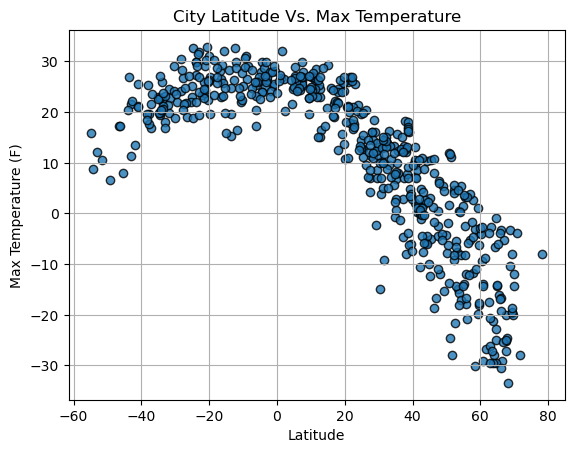

In [27]:
# Build scatter plot for latitude vs. temperature
plt.scatter(lats, max_temps, edgecolor="black", linewidth=1,
           marker="o", alpha=0.8, label="Citites")

# Incorporate the other graph properties
plt.title("City Latitude Vs. Max Temperature")
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("../output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

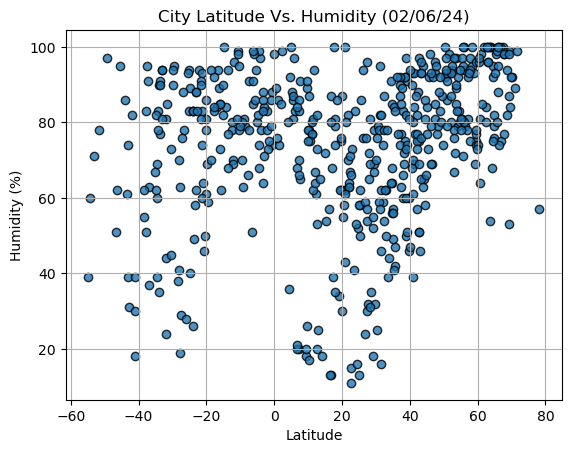

In [57]:
# Build the scatter plots for latitude vs. humidity
plt.scatter(lats, humidity, edgecolor='black', linewidth=1,
           marker='o', alpha=0.8, label="Citites")

# Incorporate the other graph properties
plt.title("City Latitude Vs. Humidity (%s)" % time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("../output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

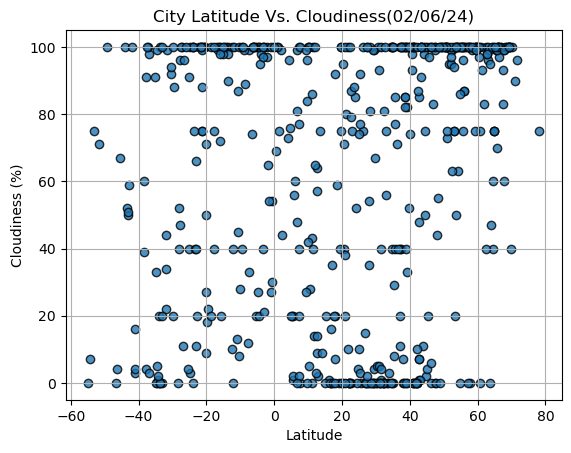

In [31]:
# Build the scatter plots for latitude vs. cloudiness
plt.scatter(lats, cloudiness, edgecolor='black',
           linewidth=1, marker="o", alpha=0.8, label="Cities")

# Incorporate the other graph properties
plt.title("City Latitude Vs. Cloudiness(%s)" % time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("../output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

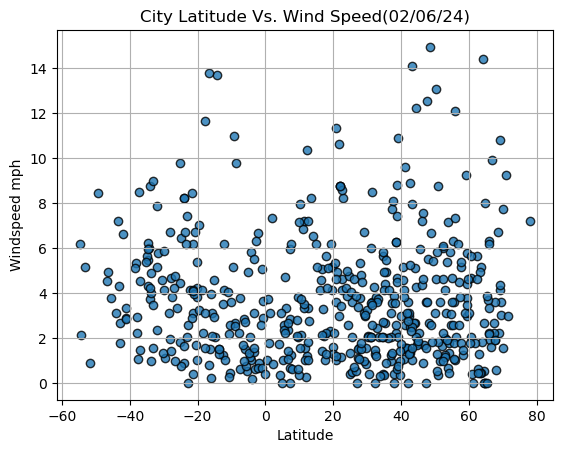

In [33]:
# Build the scatter plots for latitude vs. wind speed
plt.scatter(lats, wind_speed, edgecolor="black", linewidth=1,
           marker="o", alpha=0.8, label="Cities")

# Incorporate the other graph properties
plt.title("City Latitude Vs. Wind Speed(%s)" % time.strftime("%x"))
plt.ylabel("Windspeed mph")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("../output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [34]:
# Define a function to create Linear Regression plots
def linear_regression_plot(x_values, y_values, title, text_coordinates):
    
    (slope, intercept, rvalue, pvalue, stderr) = linregress (x_values, y_values)
    regress_values = x_values * slope + intercept 
    line_eq = "y = " + str(round(slope,2)) + " x + " + str(round(intercept,2))
    
    plt.scatter(x_values, y_values)
    plt.plot(x_values, regress_values, "r-")
    plt.annotate(line_eq, text_coordinates, fontsize=15, color="red")
    plt.xlabel("Latitude")
    print(f"The r-squared is: {rvalue}")
    plt.show()

In [35]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = city_data_df.loc[(city_data_df["Lat"] >= 0)]

# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,whitehorse,60.7161,-135.0538,-13.83,81,75,2.06,CA,1707270499
3,agria,47.9026,20.3733,6.32,77,44,5.52,HU,1707270516
6,albany,42.6001,-73.9662,-1.18,75,7,1.43,US,1707270519
10,lagoa,39.0500,-27.9833,16.03,91,82,10.88,PT,1707270523
11,anadyr,64.7500,177.4833,-22.72,76,75,8.00,RU,1707270523


In [37]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = city_data_df[(city_data_df["Lat"]) <0]

# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
1,puerto natales,-51.7236,-72.4875,10.50,78,71,0.88,CL,1707270515
2,hithadhoo,-0.6000,73.0833,28.21,74,30,2.89,MV,1707270516
4,ushuaia,-54.8000,-68.3000,15.81,39,0,6.17,AR,1707270517
5,blackmans bay,-43.0167,147.3167,21.52,39,50,1.79,AU,1707270518
7,grytviken,-54.2811,-36.5092,8.87,60,7,2.14,GS,1707270520


###  Temperature vs. Latitude Linear Regression Plot

The r-squared is: -0.8812979420741711


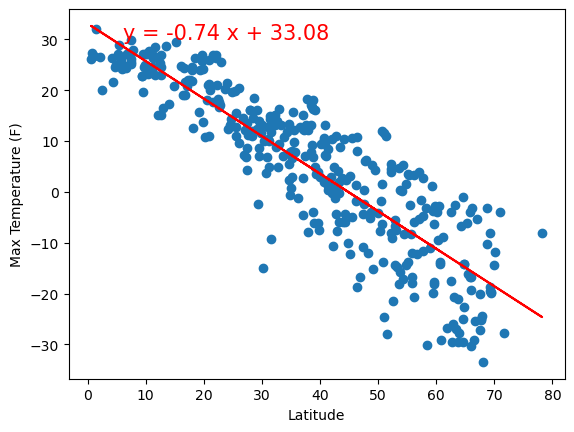

In [41]:
# Linear regression on Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]
plt.ylabel("Max Temperature (F)")
linear_regression_plot(x_values, y_values, text_coordinates=(6,30), title=' ')


The r-squared is: 0.5503214997854792


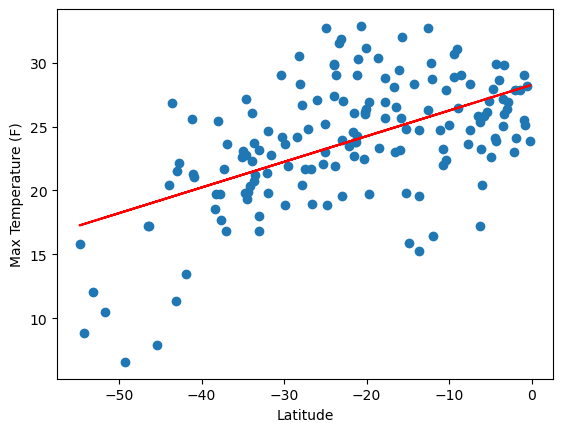

In [44]:
# Linear regression on Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]
plt.ylabel("Max Temperature (F)")
linear_regression_plot(x_values, y_values, text_coordinates=(-30,40), title=' ')

**Discussion about the linear relationship:** There is a strong negative relationship with temperature and latitude in the northern hemisphere by way of the r-squared value being -0.88. In the southern hemisphere there is a slightly strong positive relationship between temperature and latitidue by way of the r-squared value being 0.55. This suggest that there is a strong and slightly strong correlation of temperature and latitude with the northern and southern hemispheres respectively. 

### Humidity vs. Latitude Linear Regression Plot

The r-squared is: 0.42746729627091923


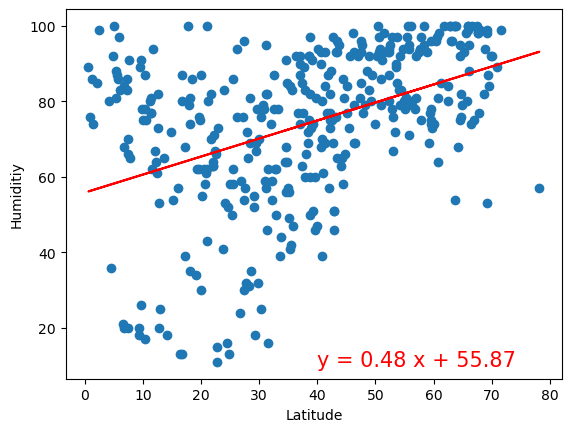

In [45]:
# Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Humidity"]
plt.ylabel("Humiditiy")
linear_regression_plot(x_values, y_values, text_coordinates=(40,10), title=' ')

The r-squared is: 0.356910797132586


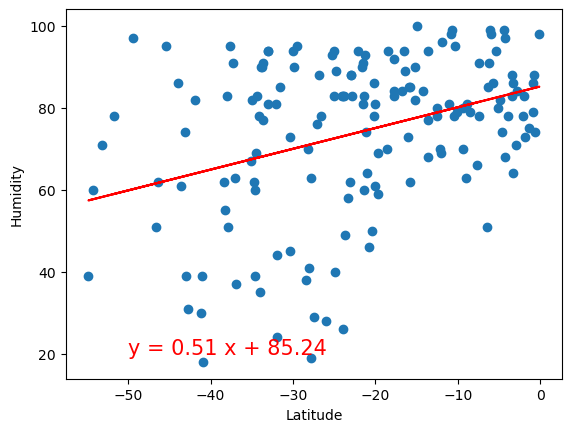

In [46]:
# Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Humidity"]
plt.ylabel("Humidity")
linear_regression_plot(x_values, y_values, text_coordinates=(-50,20), title=' ')

**Discussion about the linear relationship:** Both graphs suggest that humidity and latitude are weakly correlated in northern and southern hemispheres by nature of the r-square values being 0.43 and 0.36 respectively. 

### Cloudiness vs. Latitude Linear Regression Plot

The r-squared is: 0.37982590432049357


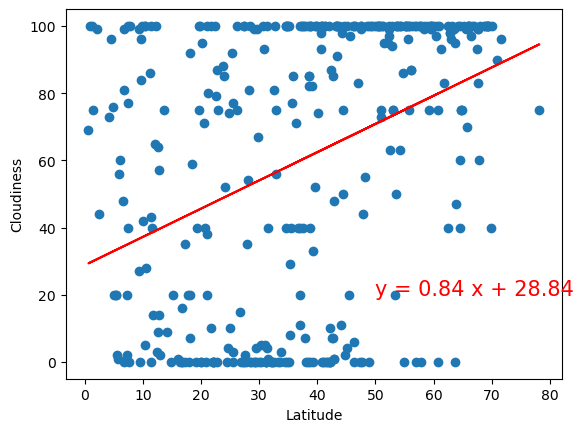

In [49]:
# Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Cloudiness"]
plt.ylabel("Cloudiness")
linear_regression_plot(x_values, y_values, text_coordinates=(50,20), title=' ')

The r-squared is: 0.27803988720852524


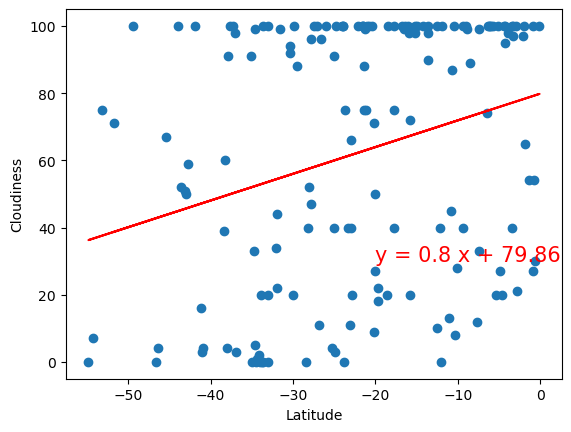

In [50]:
# Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Cloudiness"]
plt.ylabel("Cloudiness")
linear_regression_plot(x_values, y_values, text_coordinates=(-20,30), title=" ")

**Discussion about the linear relationship:** For both graphs There seems to be a weak positive correlation with cloudiness adn latitude in both the norhtern and southern hemispheres. This would suggest that perhaps cloudiness may be weakly correlated with latitude by reason of the r-squared values being 0.38 and 0.28 respectively. 

### Wind Speed vs. Latitude Linear Regression Plot

The r-squared is: 0.06626371896087856


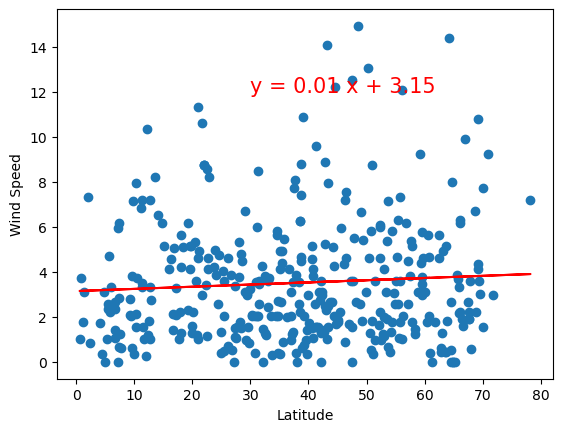

In [52]:
# Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Wind Speed"]
plt.ylabel("Wind Speed")
linear_regression_plot(x_values, y_values, text_coordinates=(30,12), title=" ")


The r-squared is: -0.2150100965334693


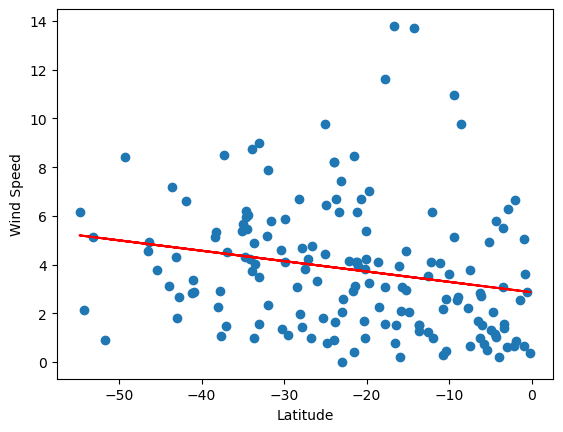

In [54]:
# Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Wind Speed"]
plt.ylabel("Wind Speed")
linear_regression_plot(x_values, y_values, text_coordinates=(6,30),title=' ')

**Discussion about the linear relationship:** The windspeed for the northern hemisphere shows a very weak positive relationship with Latitude and windspeed, and the windspeed of the southern hemisphere shows a weak negative relationship with the windspeed and latitude. This suggests that windspeed may not be influence by latitude and hemisphere by reason of r-squared values being 0.07 and -0.22 respectively. 